# **Logistic Regression in Machine Learning**  

Logistic regression is a widely used algorithm in Machine Learning, falling under the category of **Supervised Learning**. It is primarily employed to **predict categorical dependent variables** based on a set of independent variables. Unlike regression tasks, logistic regression is specifically designed for **classification problems**, where the output is a discrete or categorical value, such as **Yes/No, 0/1, or True/False**. Instead of providing exact binary outputs, logistic regression outputs **probabilistic values** that range between **0 and 1**.  

While logistic regression shares some similarities with **linear regression**, their applications differ.  
- **Linear regression** is used for predicting **continuous values** in regression problems.  
- **Logistic regression** is applied to **classification tasks**.  

In logistic regression, an **"S"-shaped logistic function** (also known as the **sigmoid function**) is fitted to the data, predicting two distinct outcomes (**0 or 1**). This curve represents the **likelihood of an event**, such as determining whether cells are cancerous or if a mouse is obese based on its weight.  

One of the key strengths of logistic regression is its ability to **provide probabilities** and classify new data using both **continuous and discrete datasets**. It can effectively **identify the most influential variables** for classification and handle various types of data.  

---

## **Logistic Function (Sigmoid Function)**  

The **sigmoid function** is a mathematical tool used to **map predicted values to probabilities**. It transforms any real-valued input into a value **between 0 and 1**, ensuring the output remains within these bounds. This transformation results in an **"S"-shaped curve**, which is why it is called the **sigmoid** or **logistic function**.  

In logistic regression, a **threshold value** is used to determine the classification outcome:  
- Values **above** the threshold are assigned to **1**.  
- Values **below** the threshold are assigned to **0**.  

---

## **Assumptions for Logistic Regression**  
1. The **dependent variable** must be **categorical**.  
2. The **independent variables** should not exhibit **multi-collinearity**.  

---

## **Logistic Regression Equation**  

The **logistic regression equation** is derived from the **linear regression equation**. While **linear regression** predicts continuous values, logistic regression **restricts** the output to values **between 0 and 1**. The equation is transformed using the **sigmoid function** to achieve this.  

---

## **Types of Logistic Regression**  

Logistic regression can be categorized into three types based on the nature of the **dependent variable**:  

1. **Binomial**:  
   - Involves **two possible outcomes** for the dependent variable, such as **0/1, Pass/Fail, Yes/No**.  

2. **Multinomial**:  
   - Deals with **three or more unordered categories**, such as **"cat," "dog," or "sheep."**  

3. **Ordinal**:  
   - Handles **three or more ordered categories**, such as **"low," "medium," or "high."**  

---

Logistic regression is a **powerful tool** in machine learning due to its ability to handle **classification tasks effectively** while providing **interpretable probabilistic outputs**.  


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score,precision_score,f1_score,classification_report,confusion_matrix

In [ ]:
df=sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# remove deck column
df.drop('deck',axis=1,inplace=True)


In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
age,177
embarked,2
embark_town,2
survived,0
pclass,0
sex,0
sibsp,0
parch,0
fare,0
class,0


In [ ]:
#imputing missing values
df["age"]=df['age'].fillna(df['age'].median())
df['embarked']=df['embarked'].fillna(df['embarked'].mode()[0])
df['embark_town']=df['embark_town'].fillna(df['embark_town'].mode()[0])

In [ ]:
# encoding categorical features
for col in df.columns:
  if df[col].dtype=='object' or df[col].dtype.name=='category':
    df[col]=LabelEncoder().fit_transform(df[col])

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


In [ ]:
X=df.drop('survived',axis=1)
y=df['survived']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# predict the value
y_pred=model.predict(X_test)

In [ ]:
# evaluate the model by accuracy_score, recall_score,precision_score,f1_score,classification_report,confusion_matrix
print("Accuracy score:", accuracy_score(y_test,y_pred))
print("Recall score:", recall_score(y_test,y_pred))
print("Precision score:", precision_score(y_test,y_pred))
print("F1 score:", f1_score(y_test,y_pred))
print("Confusion matric:", confusion_matrix(y_test,y_pred))
print("Classification Report:", classification_report(y_test,y_pred))

Accuracy score: 1.0
Recall score: 1.0
Precision score: 1.0
F1 score: 1.0
Confusion matric: [[106   0]
 [  0  73]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00        73

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



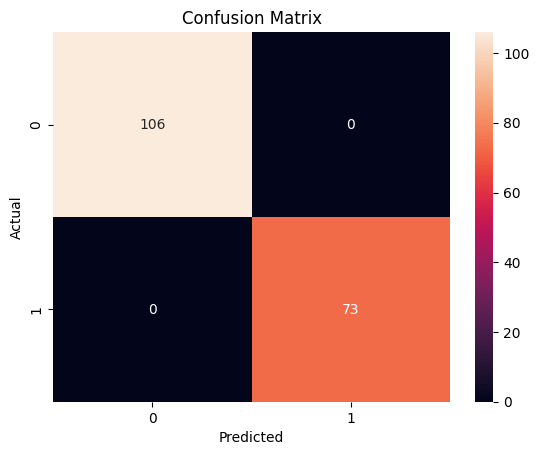

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Save the model to Google Drive
import pickle
from google.colab import drive
drive.mount('/content/drive')

# Specify the path where you want to save the file in Google Drive
file_path = '/content/drive/My Drive/Logistic_Regression.pkl'

with open(file_path, 'wb') as f:
    pickle.dump(model, f)

print(f"Model saved to: {file_path}")

Mounted at /content/drive
Model saved to: /content/drive/My Drive/Logistic_Regression.pkl
